In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Ejercicios 

1. Indicar si se esperaría generalmente que el rendimiento de un método estadístico flexible sea mejor o peor que un método inflexible.

* El tamaño de muestra $n$ es extremadamente grande y el número de predictores $p$ es pequeño.

En este caso el método flexible podría dar un mejor rendimiento dado que tiene una buena cantidad de observaciones para soportar la complejidad de un modelo más flexible.

* El número de predictores $p$ es extremadamente largo y el número de observaciones $n$ es pequeño.

En este caso es mejor un modelo inflexible, no hay la cantidad de datos para soportar la complejidad de un método más complejo.

* La relación entre los predictores y respuesta es altamente no lineal

En este caso sería mejor un modelo más flexible, un modelo inflexible no representaría la relación compleja no lineal de los predictores y la respuesta.

* La varianza de los terminos del error, $\sigma^2 = Var(\epsilon)$ es extremadamente alta.

En este caso sería mejor un modelo flexible que nos deje experimentar una combinación diferente del cambio entre varianza y sesgo para tratar de minimizar estos dos, logrando el error óptimo.


2. Explicar en cada escenario si es una clasificación o regresión, si queremos inferencia o predicción. Dar $n$ y $p$.

* Obtenemos un conjunto de datos de las 500 firmas top en US. Para cada firma guardamos la ganancia record, número de empleados, industria y el salario del CEO. Queremos entender qué factores afectan el salario del CEO

En este caso tenemos $n = 500$, $p = 3$ y nos interesa más la **inferencia** que la predicción, queremos saber cómo las variables afectan al salario del CEO.

* Se considera lanzar un nuevo producto y queremos saber si será un exito o un fallo. Recolectamos datos de 20 productos similares que se lanzaron anteriormente. Para cada producto tenemos si fue exito o fallo, precio, presupuesto de marketing, precio de la competencia, y otras 10 variables.

En este caso tenemos $n = 20$, $p = 13$, en este caso nos interesa la **Predicción**, queremos saber si el producto va a fallar o ser un éxito.

* Estamos interesados en predecir el % de cambio en el cambio USD/Euro en relación a los cambios semanales en el mercado de acciones en el mundo. Por lo tanto recolectamos datos semanales para todo el 2012. Para cada semana recolectamos el cambio porcentual en USD/Euro, el cambio porcentual del mercado US, el cambio porcentual en Inglaterra y el cambio porcentual de el mercado Alemán.

En este caso nos interesa predecir, no la inferencia. Tenemos $n = 52$ el número de semanas en el año y $p = 3$, las tres variables explicativas, es un ejercicio de **regresión**

3. 

4. Pensar en algunos casos de aplicaciones en la vida real para el parendizaje estadístico

a) Describir tres aplicaciones de la vida real en la cual la clasificación sería útil. Se busca inferencia o predicción?

- Predecir intentos de fraude, clasificar transacciones en fraude o no fraude. En este caso nos importa la predicción.
- Clasificar imagenes según el tipo de imagen que sea, en este caso también nos interesa principalmente la predicción.
- Clasificar la persona basada en la voz, en este caso interesa la predicción.

b) Describir tres aplicaciones en la que la regresión sería útil

- Predecir la producción de una empresa la cual depende de diferentes productos para producir, nos interesa la predicción pero también la inferencia.
- Predecir el precio de bienes raices dependiente de las caracteristicas de la propiedad, en este caso nos interesan ambas partes.
- Descubrir qué variables son las más importantes al momento de predecir la nota de los estudiantes en la universidad, en este caso nos interesa más la inferencia.

5. Cuales son las ventajas y desventajas de un modelo muy flexible para regresión o clasificación? Bajo que circunstancias puede un modelo más flexible ser preferido a un modelo menos flexible? Cuando sería mejor un modelo menos flexible?

Un modelo muy flexible nos permite modelar relaciones mucho más complejas en nuestro conjunto de datos en la situación que un modelo menos flexible no nos dé un buen ajuste a los datos, al tener un modelo muy flexible se vuelve más complejo y se puede perder interpretabilidad.

Un modelo mas flexible se puede preferir en lugar a un modelo inflexible si nos importa más la predicción que la inferencia, al complejizar el modelo se pierde la interpretabilidad de los parámetros pero se puede lograr un mayor rendimiento a la hora de predecir.

Un modelo menos flexible se podría preferir cuando nos interesa más la inferencia de los parámetros, al tener menos parámetros y ser menos compleja se vuelve más interpretable.

6. Describir las diferencias entre un modelo paramétrico y uno no paramétrico. Cuales son las ventajas y desventajas?

En el modelo paramétrico decidimos que los datos van a seguir una distribución antes de modelar, lo cual simplifica el modelado, necesitamos menos parámetros para estimar y los parámetros son más interpretables, sin embargo el modelo podría no ser lo suficiente para modelar la complejidad de algunos datos. Para el caso no paramétrico tenemos muchos mas parámetros no interpretables, no asumimos que los datos siguen alguna distribución, por lo que es más complejo modelar, sin embargo esto podría mejorar el rendimiento del modelo si la verdadera relación es compleja.

7.

8. Este ejercicio usa el conjunto de datos `College`

In [2]:
## A) usar pd.read_scv() para leer el archivo

college = pd.read_csv("datasets/College.csv")

In [3]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
college2 = pd.read_csv("datasets/College.csv", index_col = 0)
college3 = college.rename({"Unnamed: 0": "College"}, axis = 1)
college3 = college3.set_index("College")

In [5]:
college2

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [6]:
college3

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


In [7]:
college = college3

In [8]:
## C) Usar el método describe() para producir un resúmen de las variables en el conjunto de datos

college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


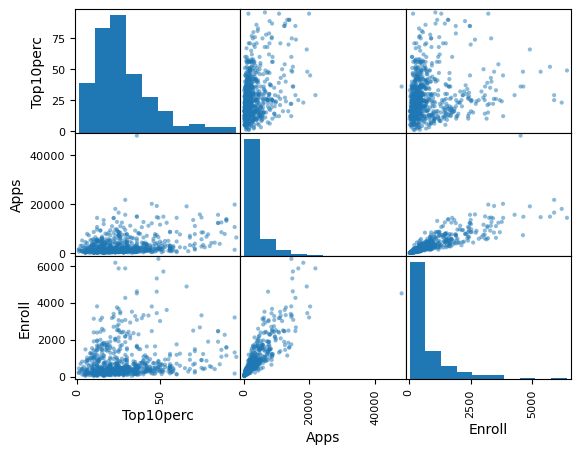

In [9]:
## D) Usar pd.plotting.scatter_matrix() para producir un gráfico de dispersión de las primeras columnas

pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]]);

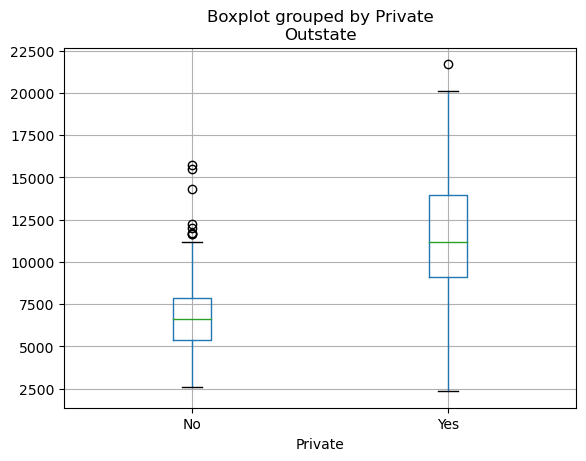

In [10]:
## E) Usar el método boxplot() para producir boxplots de Outstate vs Private

college.boxplot("Outstate", "Private");

In [11]:
## F) crear una nueva variable cualitativa llamada Elite agrupando la variable top10perc
## en dos grupos basado si la proporción de estudiantes que vienen del top 10% excede 50%

college['Elite'] = pd.cut(college['Top10perc'],
                          [0,50,100],
                          labels=['No', 'Yes'])
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
College,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,No
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,No
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,No


In [12]:
## Usar value_counts() para ver cuantas universidades elites hay

college["Elite"].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

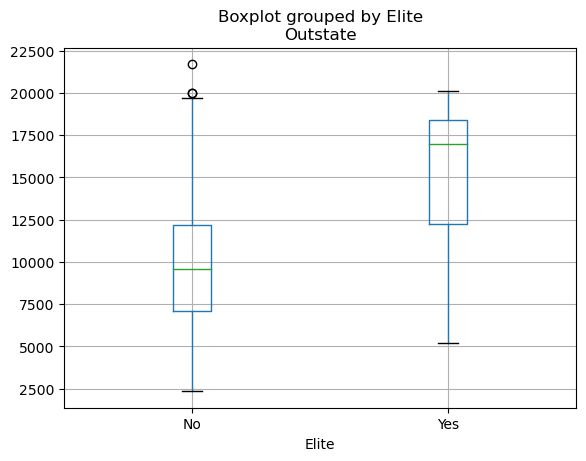

In [13]:
## Usar Boxplot() para producir boxplots de Outside vx Elite

college.boxplot("Outstate", "Elite")

array([<Axes: title={'center': 'Books'}>], dtype=object)

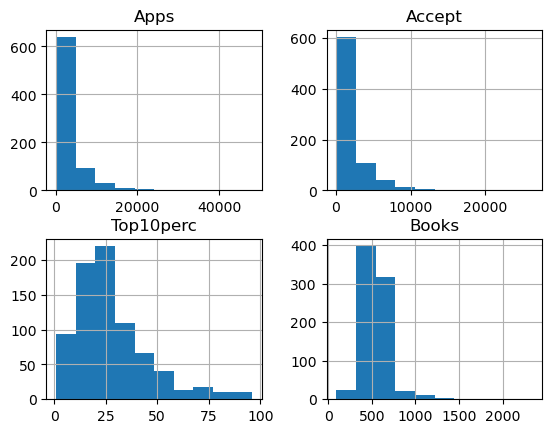

In [14]:
## Usar plot.hist() para producir histogramas

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

college.hist(column = "Apps", ax = ax1)
college.hist(column = "Accept", ax = ax2)
college.hist(column = "Top10perc", ax = ax3)
college.hist(column = "Books", ax = ax4)

9. En este ejercicio usamos el conjunto de datos `Auto`, empezamos eliminando los datos faltantes


In [15]:
autos = pd.read_csv("datasets/Auto.csv")

In [16]:
autos

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [17]:
# no hay datos faltantes
# A) Cuales de los predictores son cuantitativos y cuales cualitativos?

autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


Name y horsepower son cualitativos, horsepower debería ser cuantitativo.

In [27]:
print(autos["horsepower"].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [30]:
## Hay un ? en horsepower, ahora lo reemplazamos con la media

autos["horsepower"] = pd.to_numeric(autos["horsepower"], errors = "coerce")
autos["horsepower"].fillna(autos["horsepower"].mean(), inplace = True)

In [32]:
## B) Cual es el rango de cada predictor cuantitativo?

for i in autos.columns:
    if (i == "name"):
        break
    rango = np.max(autos[i]) - np.min(autos[i])
    print(f"El rango de {i} es {rango}")

El rango de mpg es 37.6
El rango de cylinders es 5
El rango de displacement es 387.0
El rango de horsepower es 184.0
El rango de weight es 3527
El rango de acceleration es 16.8
El rango de year es 12
El rango de origin es 2


In [38]:
for i in autos.columns:
    if (i == "name"):
        break
    mean = autos[i].mean()
    sd = autos[i].std()
    print(f"La media de {i} es {mean:.2f} y la desviación estándar es {sd:.2f}")

La media de mpg es 23.52 y la desviación estándar es 7.83
La media de cylinders es 5.46 y la desviación estándar es 1.70
La media de displacement es 193.53 y la desviación estándar es 104.38
La media de horsepower es 104.47 y la desviación estándar es 38.25
La media de weight es 2970.26 y la desviación estándar es 847.90
La media de acceleration es 15.56 y la desviación estándar es 2.75
La media de year es 75.99 y la desviación estándar es 3.69
La media de origin es 1.57 y la desviación estándar es 0.80


In [48]:
## D) quitar las observaciones de la 10 a la 85. cual es el rango, medi y desviación estándar?

autos2 = autos.iloc[10:85,]

In [49]:
autos2

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
10,15.0,8,383.0,170.0,3563,10.0,70,1,dodge challenger se
11,14.0,8,340.0,160.0,3609,8.0,70,1,plymouth 'cuda 340
12,15.0,8,400.0,150.0,3761,9.5,70,1,chevrolet monte carlo
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
14,24.0,4,113.0,95.0,2372,15.0,70,3,toyota corona mark ii
...,...,...,...,...,...,...,...,...,...
80,22.0,4,122.0,86.0,2395,16.0,72,1,ford pinto (sw)
81,28.0,4,97.0,92.0,2288,17.0,72,3,datsun 510 (sw)
82,23.0,4,120.0,97.0,2506,14.5,72,3,toyouta corona mark ii (sw)
83,28.0,4,98.0,80.0,2164,15.0,72,1,dodge colt (sw)


In [51]:
for i in (autos2.columns):
    if (i == "name"):
        break
    mean = autos2[i].mean()
    sd = autos2[i].std()
    print(f"La media de {i} es {mean:.2f} y la desviación estándar es {sd:.2f}")    

La media de mpg es 19.68 y la desviación estándar es 6.14
La media de cylinders es 5.80 y la desviación estándar es 1.85
La media de displacement es 218.66 y la desviación estándar es 118.45
La media de horsepower es 118.18 y la desviación estándar es 44.54
La media de weight es 3113.89 y la desviación estándar es 984.14
La media de acceleration es 14.93 y la desviación estándar es 2.87
La media de year es 71.12 y la desviación estándar es 0.79
La media de origin es 1.48 y la desviación estándar es 0.74


C:\Users\mateo\AppData\Local\Temp\ipykernel_26660\4196617390.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(autos, ax = ax);


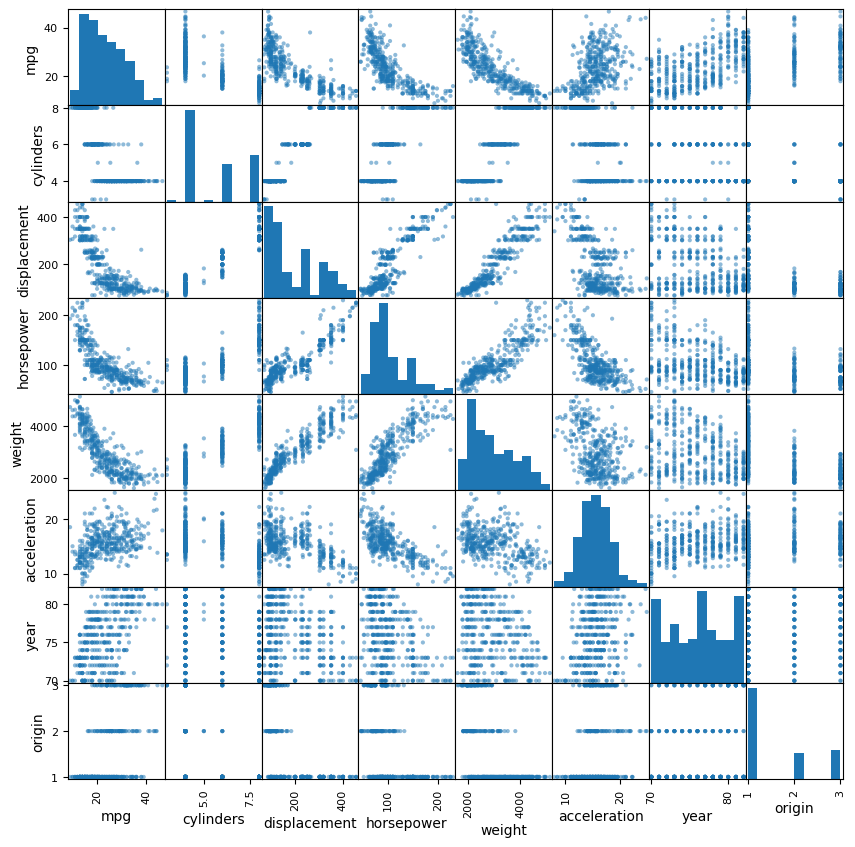

In [56]:
f, ax = plt.subplots(figsize = (10, 10))
pd.plotting.scatter_matrix(autos, ax = ax);

La variable mpg parece estar relacionada con cylinders, displacement, horsepower, weight, acceleration, year. Todas estas relaciones se pueden empezar a notar por las gráficas de dispersión.

10. Ahora se va a usar la base de datos `Boston`

In [57]:
boston = pd.read_csv("datasets/Boston.csv")

In [58]:
boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


En este conjunto de datos hay 506 filas con 14 columnas, las filas son diferentes casas y sus características para predecir el precio medio de la casa.

C:\Users\mateo\AppData\Local\Temp\ipykernel_26660\111047307.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(boston, ax = ax);


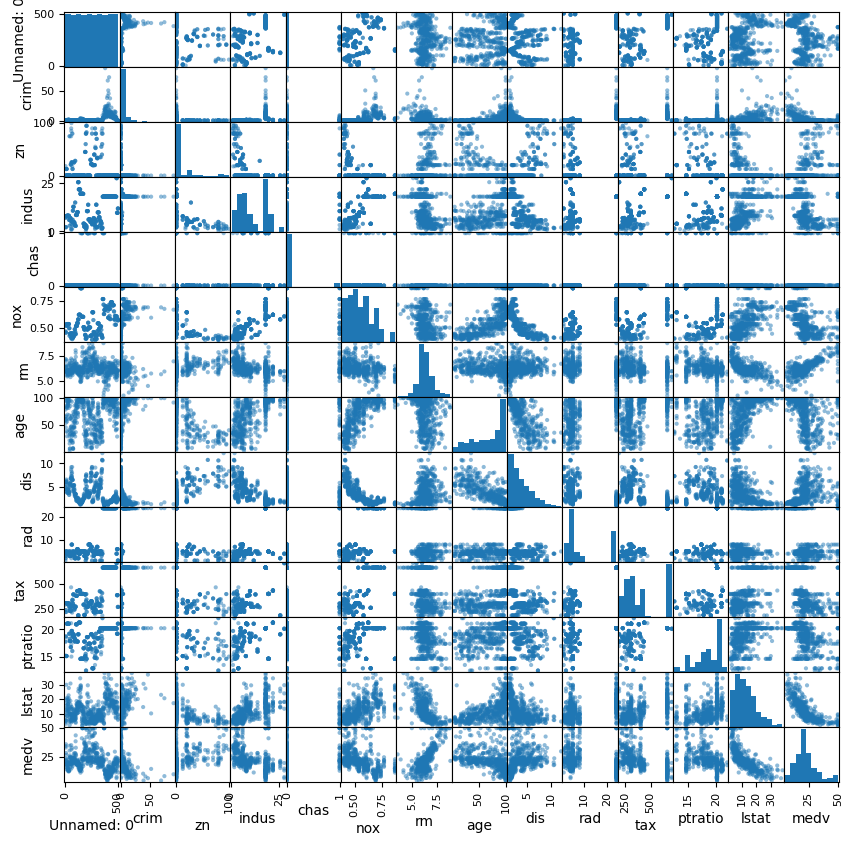

In [59]:
## C) Hacer diagramas de dispersión para ver el comportamiento de las variables

f, ax = plt.subplots(figsize = (10, 10))
pd.plotting.scatter_matrix(boston, ax = ax);